### Step 1: <span style="color:green">Import Libraries</span> 


In [16]:
import pandas as pd

### Step 2: <span style="color:green">Import the Airbnb Dataset</span> 

In [19]:
df = pd.read_csv("airbnb_2.csv")
print(df.head())

print(df.info())

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  19

### Step 3: <span style="color:green">Exploring your data with Pandas</span> 




<b> i)  Count how many airbnb listings are in each of the 5 Neighbourhood Groups (Manhattan, Brooklyn, Queens, Bronx, Staten Island) and identify which Neighbourhood Groups has the largest number of Airbnb Listings </b>
<p>

In [22]:
listings = df['neighbourhood_group'].value_counts()
print(listings)

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64


We want to focus our attention on the Neighbourhood Groups that have the top 3 number of Airbnb Listings.

<b> ii) Calculate the % listings that each Neighbourhood Group contains. </b>


In [23]:
total = len(df)
by_nh = df.groupby('neighbourhood_group').size().reset_index(name='count')
by_nh = by_nh.sort_values('count',ascending=False)
by_nh['% of listings'] = (by_nh['count'] / total)
print(by_nh)

  neighbourhood_group  count  % of listings
2           Manhattan  21661       0.443011
1            Brooklyn  20104       0.411167
3              Queens   5666       0.115881
0               Bronx   1091       0.022313
4       Staten Island    373       0.007629


<b> iii) Create a new calculated field called Revenue and place this into the Airbnb Dataframe. This is to be calculated by using the Price Column x Number_Of_Reviews Columns </b>

<b> Put your code in the box below </b>

In [24]:
df['Revenue'] = df['price'] * df['number_of_reviews']
print(df.head())

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  19

<b> iv) Create a Bar Plot that shows which Neighbourhood Group has the highest average revenues. In order to best
calculate this, you'd want to consider how you can use the .groupby() syntax to assist you! </b>

If you're stuck, we recommend you go back to <a href = https://learn.datacamp.com/courses/manipulating-dataframes-with-pandas> this </a> datacamp link. Specifically Chapter 4 which covers how GROUP BY is used in Pandas.

<b> Put your code in the box below </b>

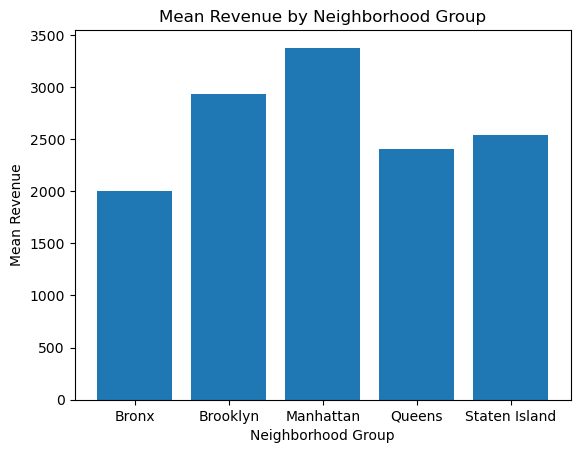

In [25]:
import matplotlib.pyplot as plt

grouped= df.groupby("neighbourhood_group")["Revenue"].mean()
plt.bar(grouped.index, grouped.values)
plt.title('Mean Revenue by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Mean Revenue')
plt.show()

<h3> <span style="color:green">Challenge Questions</span> </h3>

<b> V) Filter the Airbnb Dataframe to include only the Neighbourhood Groups Manhattan, Brookly and Queens. 
    

In [29]:
condition1= df['neighbourhood_group']=='Brooklyn'
condition2= df['neighbourhood_group']=='Manhattan'
condition3= df['neighbourhood_group']=='Queens'

filter_df= df[condition1|condition2|condition3]

top_rev= filter_df.groupby(['neighbourhood_group', 'neighbourhood'])['Revenue'].sum().sort_values(ascending=False).reset_index()
top_rev.groupby(['neighbourhood_group']).head(3).sort_values(by=['neighbourhood_group'])


,neighbourhood_group,neighbourhood,Revenue
0,Brooklyn,Williamsburg,12389011
1,Brooklyn,Bedford-Stuyvesant,12352457
8,Brooklyn,Bushwick,4762224
2,Manhattan,Harlem,8598692
3,Manhattan,Hell's Kitchen,8238991
4,Manhattan,East Village,7574535
17,Queens,Astoria,1880840
28,Queens,Long Island City,1374945
33,Queens,Flushing,1140450


<b> VI) Building on the previous question where you identified the top 3 Neighbourhoods within each of the three neighbourhood_groups based off Revenues, please filter the Airbnb Dataframe to include only these neighbourhoods. 
    
Upon completion of this, identify the  top average revenue generating room type for each of the nine neighbourhoods and plot this out in a Bar Chart.</b>


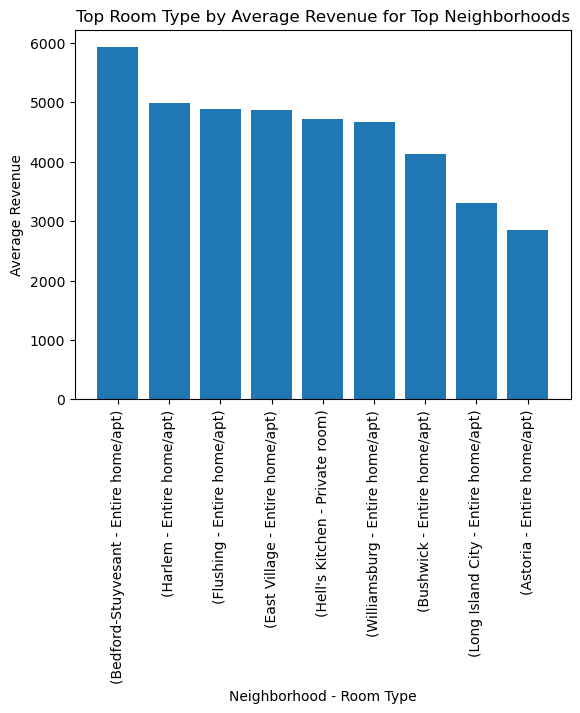

In [62]:
top9_neighborhoods = ["Williamsburg", "Bedford-Stuyvesant", "Bushwick", "Harlem",
                      "Hell's Kitchen", "East Village", "Astoria", "Long Island City", "Flushing"]

top9_df = df[df['neighbourhood'].isin(top9_neighborhoods)]

grouped_data = top9_df.groupby(["neighbourhood", "room_type"])["Revenue"].mean()

grouped_data = grouped_data.reset_index()

top_room_types = grouped_data.sort_values(['Revenue'], ascending=[False]).groupby('neighbourhood').head(1)

plt.bar( "(" + top_room_types['neighbourhood'] + " - " + top_room_types['room_type'] +")", top_room_types['Revenue'])
plt.title("Top Room Type by Average Revenue for Top Neighborhoods")
plt.xlabel("Neighborhood - Room Type")
plt.ylabel("Average Revenue")
plt.xticks(rotation=90)
plt.show()